In [1]:
%pylab inline
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
import pandas as pd
from sklearn.preprocessing import label_binarize

fileURL = 'data.csv'
data=pd.read_csv(fileURL)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data[:2]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33            184.6      2019.0            0.1622   
1     ...               23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  

[2 rows x 33 columns]

In [3]:
data_features_name = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
                      'concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se',
                      'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                      'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
                      'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                      'symmetry_worst','fractal_dimension_worst']
data_target_name = 'diagnosis'
all_headers = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
                      'concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se',
                      'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                      'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
                      'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                      'symmetry_worst','fractal_dimension_worst','diagnosis']
data = data[all_headers]
X = data[data_features_name]
Y = data[data_target_name]
data[:3]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   fractal_dimension_mean    ...      texture_worst  perimeter_worst  \
0                 0.07871    ...              17.33            184.6   
1                 0.05667    ...              23.41            158.8   
2                 0.05999    ...              25.53            152.5   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                0.2654          0.4601                  0.11890          M  
1                0.1860          0.2750                  0.08902          M  
2                0.2430          0.3613                  0.08758          M  

[3 rows x 31 columns]

In [4]:
X[:2]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33            184.6      2019.0            0.1622   
1          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  

[2 rows x 30 columns]

In [5]:
Y[:2]

0    M
1    M
Name: diagnosis, dtype: object

(1)as you continue to work on the project, take note of interesting things that you come across so that you can highlight them in your paper and presentation. Do a very detailed exploratory analysis of both datasets and take note of: which features are most (or least) correlated to the outcome? what features are most correlated to one another (you can use linear regression for this)? If you apply a clustering algorithm to this data, can you separate the instances belonging to the two different classes effectively? Once you are done and you have an accurate model, how do you hope a physician or hospital might use it? Can you provide them with a confidence score that would help them know when it's actually "safe" to trust the model's prediction?

In regression and data mining problems, variables may be highly correlated with one another or “redundant”.So we can use Correlation Matrix to remove features with more than 0.70 of Correlation. 

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm


def correlation_matrix(df):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    correlations = df.corr()
    # plot correlation matrix
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = numpy.arange(0,32,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    #ax.set_xticklabels(all_headers)
    ax.set_yticklabels(all_headers)
    plt.show()

One of the simplest and most powerful filter approaches is the use of  correlation matrix filters. In regression and data mining problems, variables may be highly correlated with one another or “redundant”. 

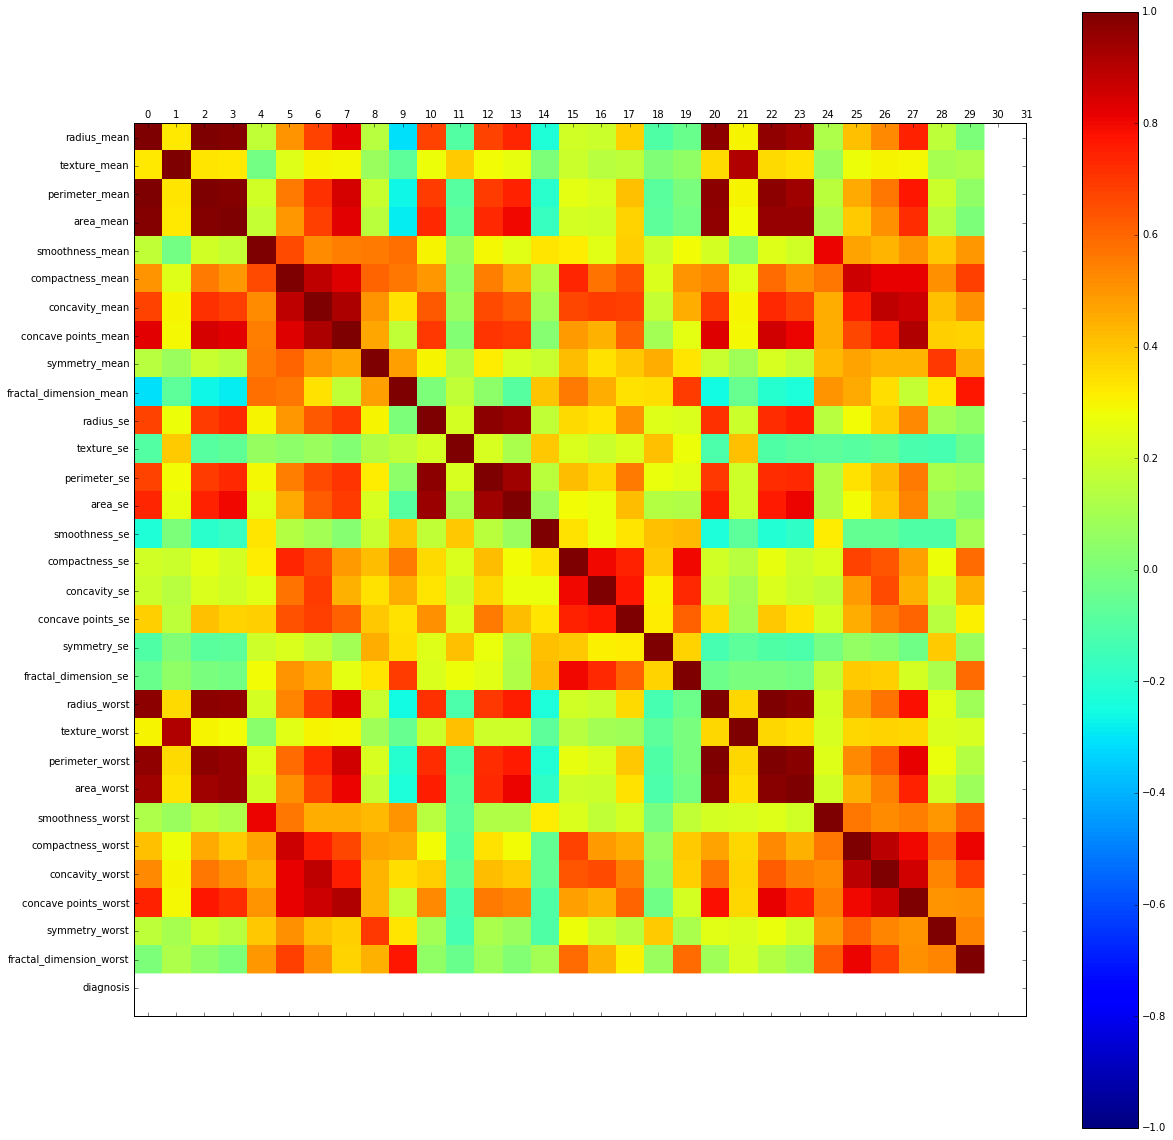

In [7]:
correlation_matrix(data)

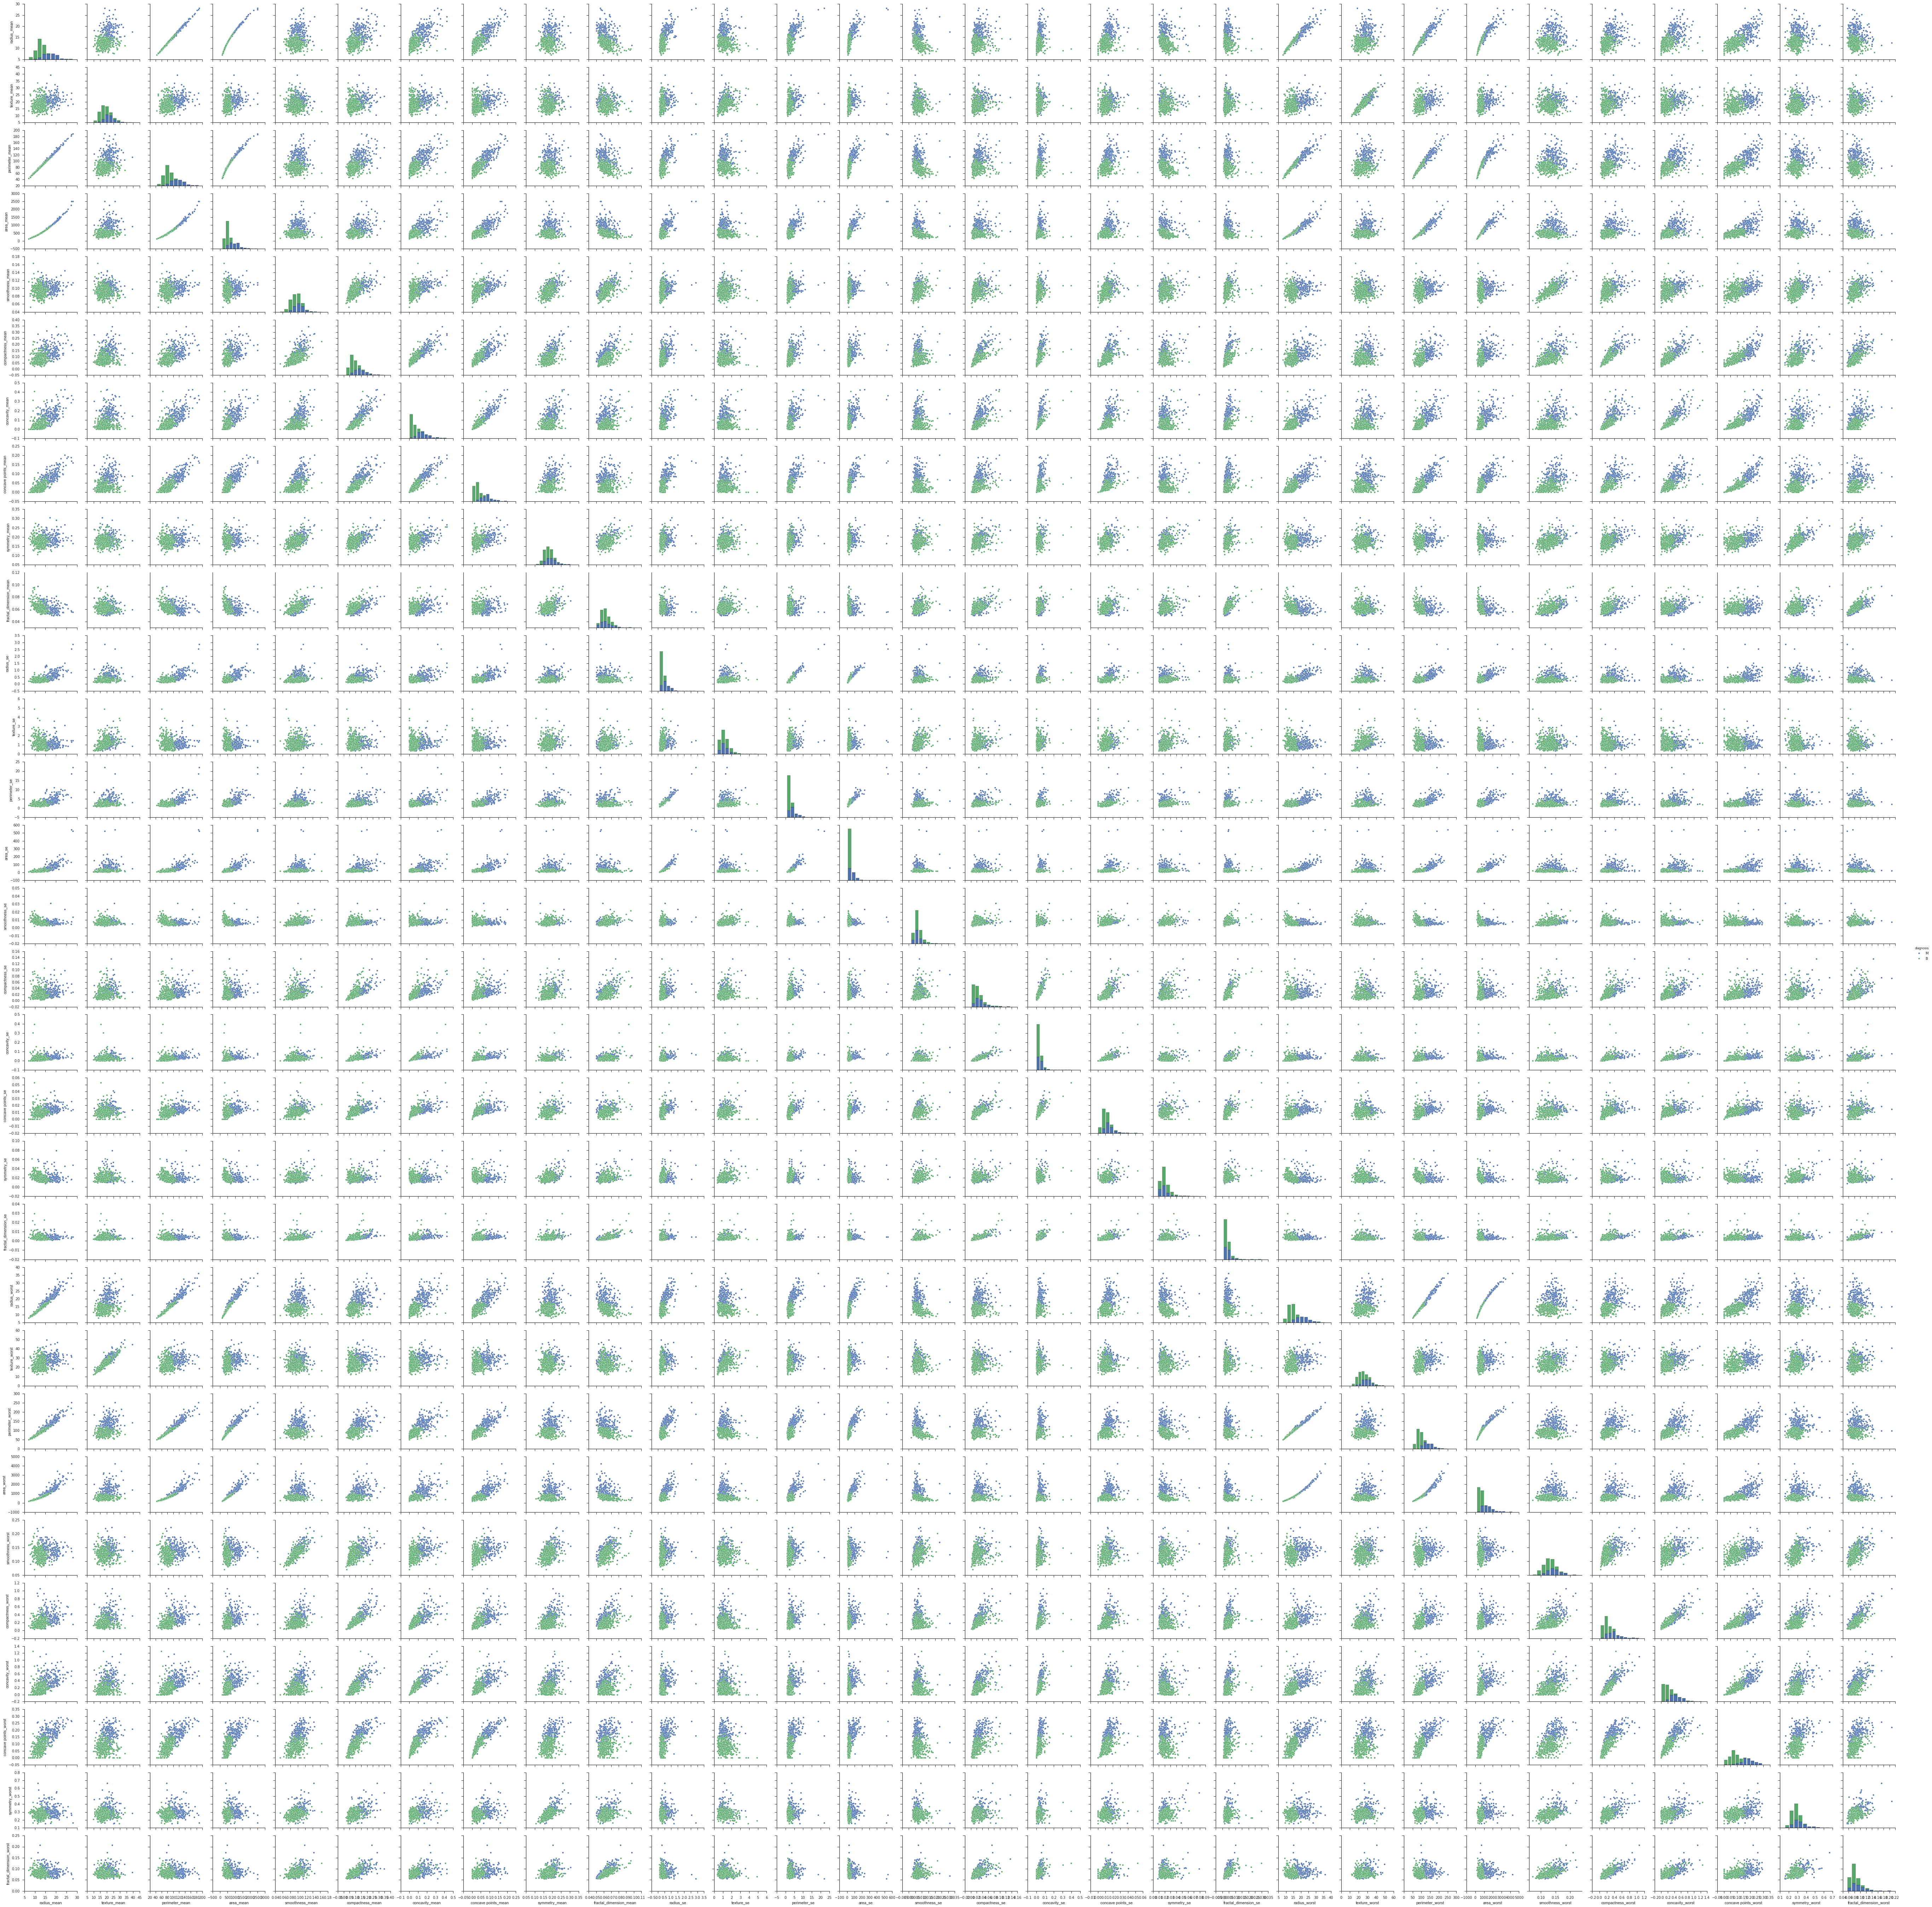

In [8]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="diagnosis")

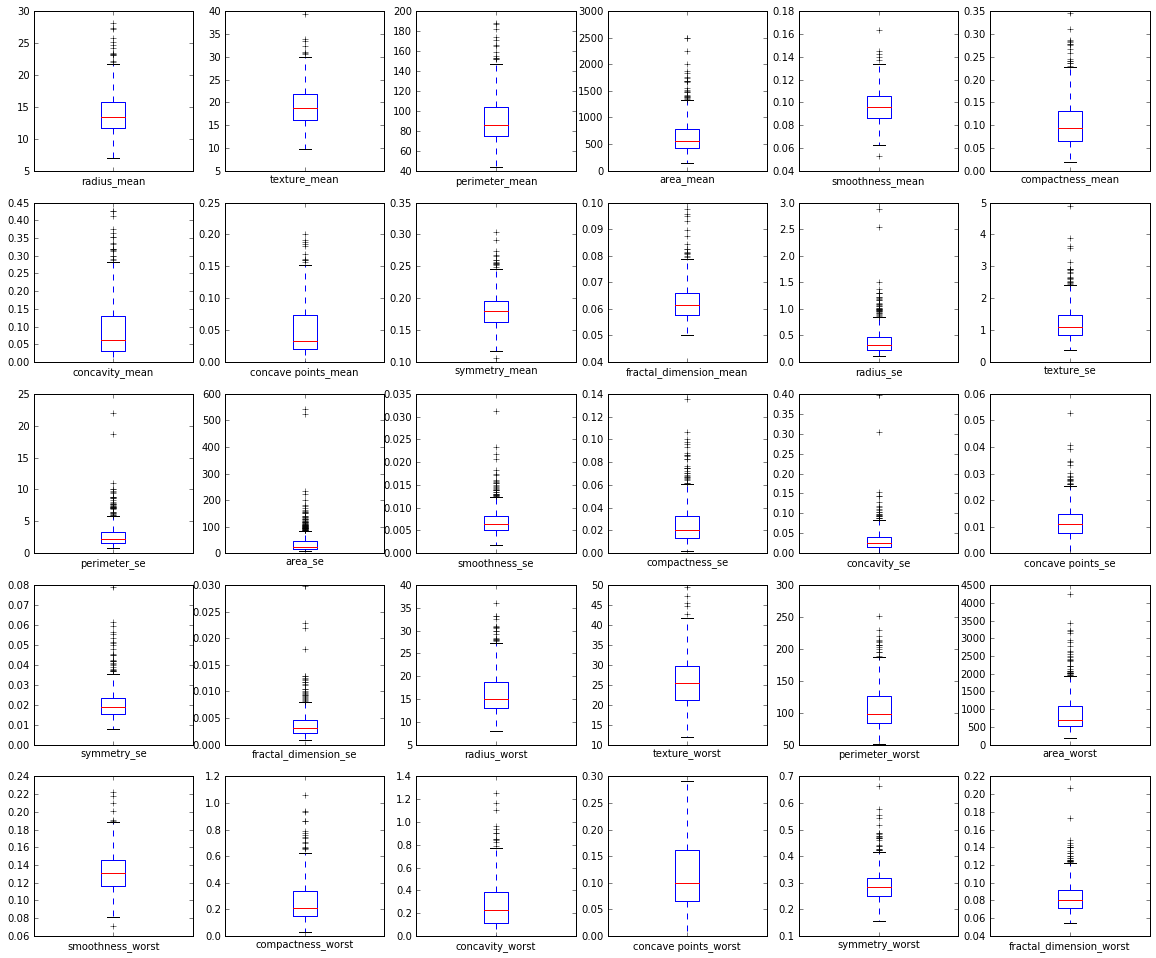

In [83]:
data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False,figsize=(20,20))
plt.show()

In [71]:
#using PCA to reduce the dimensions to 15 features
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_reduced = pca.fit_transform(X)

In [72]:
X_reduced[:3]

array([[ -1.16014257e+03,  -2.93917544e+02,  -4.85783976e+01,
          8.71197531e+00,  -3.20004861e+01,   1.26541481e+00,
          9.31336973e-01,  -1.48167035e-01,   7.45463100e-01,
          5.89359489e-01,  -3.07804338e-01,   4.34524281e-02,
         -3.47774671e-02,   6.50687182e-02,  -1.29338753e-02],
       [ -1.26912244e+03,   1.56301818e+01,   3.53945342e+01,
         -1.78612832e+01,   4.33487404e+00,  -2.25871776e-01,
         -4.60372215e-02,  -2.00803920e-01,  -4.85827948e-01,
         -8.40347188e-02,   8.06420067e-02,   3.30420791e-02,
         -4.54854950e-02,  -5.53381981e-03,   2.13681482e-02],
       [ -9.95793889e+02,   3.91567432e+01,   1.70975298e+00,
         -4.19934010e+00,   4.66529118e-01,  -2.65281116e+00,
         -7.79744676e-01,   2.74025583e-01,  -1.73874273e-01,
         -1.86993508e-01,   2.79173510e-01,  -2.04640924e-02,
         -8.35053346e-02,   2.48242077e-02,  -2.68872619e-02]])